In [2]:
## import necessary library
import pandas as pd
import numpy as np
import seaborn as sns

In [64]:
import matplotlib.pyplot as plt

In [3]:
# read the data file
df = pd.read_csv("ipd-data.csv")
df.head(2)

,title,dept,name,date,age,gender,name.1,price
0,00030403,Radiology,NaN,2024-02-28 13:09:50,NaN,NaN,MRA of Brain and Neck Vessels,11200
1,00028459,Radiology,NaN,2024-02-28 13:32:32,NaN,NaN,X-ray Chest AP View (100%),400


In [4]:
# Rename the header of the file
df.rename(columns={'title':'patid'}, inplace=True)

In [5]:
# Show the columns name
df.columns

Index(['patid', 'dept', 'name', 'date', 'age', 'gender', 'name.1', 'price'], dtype='object')

In [6]:
# Changes the columns name
df.rename(columns={'name':'patname', 'name.1':'testname', 'price':'testprice'}, inplace=True)

In [7]:
# Shows all the column that changes the name correctly
df.columns

Index(['patid', 'dept', 'patname', 'date', 'age', 'gender', 'testname',
       'testprice'],
      dtype='object')

In [8]:
# shows the data type info about columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2038 entries, 0 to 2037
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   patid      2038 non-null   object
 1   dept       2038 non-null   object
 2   patname    2035 non-null   object
 3   date       2038 non-null   object
 4   age        2032 non-null   object
 5   gender     2031 non-null   object
 6   testname   2038 non-null   object
 7   testprice  2038 non-null   int64 
dtypes: int64(1), object(7)
memory usage: 127.5+ KB


In [9]:
# find out how many type of gender format
df['gender'].unique()

array([nan, 'F', 'M', 'Female', 'Male', 'F-(C-618/B)', 'M-714/4', 'F-713',
       'c-617/b', 'c-617/B', 'M-CCU-08', 'M-C-621', 'M-CCU-18', 'f',
       'M-CCU-273', 'F-C-620', 'M-W-709/2', 'M-Cabin-614', 'M-C/714/05',
       'C-610', 'CCU-12', 'M-CCU-09', 'C-622', 'C-709', 'F (C-613)',
       'F-c-619', 'M-KT_01', '709/01', 'CCU-11', 'M-C-608', 'W-709/8',
       '618-3', 'm', 'female'], dtype=object)

In [10]:
# how many type of age format
df.age.nunique()

232

In [11]:
# Is there any null value in patient id
df.patid.isnull().sum()

np.int64(0)

In [12]:
# df1['f'] = df1.D.astype(str).str[:2].astype(int)
# Keep the first Letter of the gender
df['gender'] = df['gender'].astype(str).str[:1]
df['gender']=df['gender'].str.upper()
df.gender.value_counts()

gender
M    1040
F     981
N       7
C       7
7       1
W       1
6       1
Name: count, dtype: int64

In [14]:
df.isnull().sum()

patid        0
dept         0
patname      3
date         0
age          6
gender       0
testname     0
testprice    0
dtype: int64

In [15]:
df.dropna(inplace=True)

In [16]:
df.isna().sum()

patid        0
dept         0
patname      0
date         0
age          0
gender       0
testname     0
testprice    0
dtype: int64

In [17]:
df.shape

(2032, 8)

In [18]:
# drop the row that doesn't have M or F
a = ['C', '7', 'W', '6']
df = df[~df['gender'].isin(a)]
print(df)

         patid        dept        patname                 date     age gender  \
2        30617   Radiology   Rokeya Begum  2024-02-29 09:58:01     71y      F   
3        30633  Laboratory      Mohiuddin  2024-02-29 11:16:57  38 yrs      M   
4        30633  Laboratory      Mohiuddin  2024-02-29 11:16:57  38 yrs      M   
5        30633  Laboratory      Mohiuddin  2024-02-29 11:16:57  38 yrs      M   
6        30633  Laboratory      Mohiuddin  2024-02-29 11:16:57  38 yrs      M   
...        ...         ...            ...                  ...     ...    ...   
2033  00047959  Laboratory   Kulsum Begum  2024-08-18 11:32:04   70yrs      F   
2034  00047959  Laboratory   Kulsum Begum  2024-08-18 11:32:04   70yrs      F   
2035  00047959  Laboratory   Kulsum Begum  2024-08-18 11:32:04   70yrs      F   
2036  00047959  Laboratory   Kulsum Begum  2024-08-18 11:32:04   70yrs      F   
2037     47959   Radiology  Kulsum Begum   2024-08-18 11:43:05      70      F   

                           

In [19]:
df['age'] = df['age'].astype(str).str[:2]

C:\Users\BT\AppData\Local\Temp\ipykernel_4652\1436486853.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = df['age'].astype(str).str[:2]


In [20]:
df.head(2)

,patid,dept,patname,date,age,gender,testname,testprice
2,30617,Radiology,Rokeya Begum,2024-02-29 09:58:01,71,F,X-ray Chest AP Supine (Portable),700
3,30633,Laboratory,Mohiuddin,2024-02-29 11:16:57,38,M,Albumin,160


In [21]:
df['gender'].replace({'F': 'Female', 'M':'Male'}, inplace=True)

C:\Users\BT\AppData\Local\Temp\ipykernel_4652\2008652266.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['gender'].replace({'F': 'Female', 'M':'Male'}, inplace=True)
C:\Users\BT\AppData\Local\Temp\ipykernel_4652\2008652266.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender'].replace({'F': 'Female', 'M':'Male'}, inplace=True)

In [22]:
df.head(2)

,patid,dept,patname,date,age,gender,testname,testprice
2,30617,Radiology,Rokeya Begum,2024-02-29 09:58:01,71,Female,X-ray Chest AP Supine (Portable),700
3,30633,Laboratory,Mohiuddin,2024-02-29 11:16:57,38,Male,Albumin,160


In [23]:
df['date'] = pd.to_datetime(df['date']).dt.date.astype('datetime64[ns]')
df['patid'] = df['patid'].astype(int)
df.dtypes

C:\Users\BT\AppData\Local\Temp\ipykernel_4652\547882536.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date']).dt.date.astype('datetime64[ns]')
C:\Users\BT\AppData\Local\Temp\ipykernel_4652\547882536.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['patid'] = df['patid'].astype(int)


patid                 int64
dept                 object
patname              object
date         datetime64[ns]
age                  object
gender               object
testname             object
testprice             int64
dtype: object

In [24]:
df1 = df[['patid', 'dept', 'date', 'age', 'gender', 'testname', 'testprice']]

In [25]:
df1 = df1.reset_index()
df1.shape

(2022, 8)

In [26]:
df1.columns

Index(['index', 'patid', 'dept', 'date', 'age', 'gender', 'testname',
       'testprice'],
      dtype='object')

In [27]:
df1['age'] = df1['age'].replace({'9y':'9'})
df1['age'].unique()

array(['71', '38', '70', '76', '32', '36', '62', '63', '35', '28', '81',
       '54', '64', '66', '83', '49', '48', '58', '65', '25', '24', '15',
       '17', '29', '57', '72', '75', '8', '67', '37', '55', '42', '23',
       '34', '60', '59', '20', '41', '27', '61', '13', '30', '50', '45',
       '77', '80', '52', '40', '44', '22', '1', '56', '33', '47', '92',
       '43', '31', '16', '68', '85', '19', '51', '53', '26', '12', '02',
       '46', '69', '9', '73', '18', '95', '39', '74'], dtype=object)

In [28]:
df1['age'] = df1['age'].astype(int)
print(df1['age'].max(), " ", df1['age'].min())

95   1


In [29]:
df1.describe()

,index,patid,date,age,testprice
count,2022.000000,2022.000000,2022,2022.000000,2022.000000
mean,1023.000495,38903.888229,2024-05-24 05:17:37.566765568,53.036597,792.606330
min,2.000000,457.000000,2024-02-29 00:00:00,1.000000,80.000000
25%,515.250000,33695.000000,2024-04-22 00:00:00,42.000000,160.000000
50%,1025.500000,38710.000000,2024-05-23 00:00:00,57.000000,420.000000
75%,1531.750000,45060.000000,2024-07-10 00:00:00,65.000000,650.000000
max,2037.000000,480638.000000,2024-08-18 00:00:00,95.000000,60000.000000
std,587.739938,18261.597797,NaN,16.472148,2063.879142


In [35]:
# 5 is Saturday, 6 is Sunday 
df1['date_weekday'] = df1['date'].dt.dayofweek
df1.tail(1)

,index,patid,dept,date,age,gender,testname,testprice,date_weekday
2021,2037,47959,Radiology,2024-08-18,70,Female,X-ray Chest AP Supine (Portable),700,6


In [39]:
# Group the tenure in bins of 12 months
labels = ["{} - {}".format(i, i + 9) for i in range(1, 100, 10)]
df1['agegroup'] = pd.cut(x=df1.age, bins=range(1, 110, 10), right=False, labels=labels)

In [40]:
df1.head()

,index,patid,dept,date,age,gender,testname,testprice,date_weekday,agegroup
0,2,30617,Radiology,2024-02-29,71,Female,X-ray Chest AP Supine (Portable),700,3,71 - 80
1,3,30633,Laboratory,2024-02-29,38,Male,Albumin,160,3,31 - 40
2,4,30633,Laboratory,2024-02-29,38,Male,Calcium,160,3,31 - 40
3,5,30633,Laboratory,2024-02-29,38,Male,Electrolytes,490,3,31 - 40
4,6,30633,Laboratory,2024-02-29,38,Male,Inorganic Phos,160,3,31 - 40


In [52]:
#calculate sum of income grouped by month
price_sum = df1.groupby(df1.date.dt.month)['testprice'].sum()
price_sum

date
2      9780
3    238060
4    189060
5    296210
6    194800
7    496510
8    178230
Name: testprice, dtype: int64

Text(0.5, 1.0, 'Sum of test price vs Month')

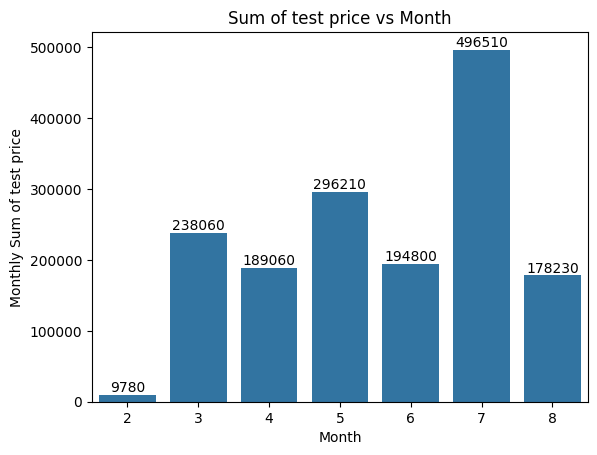

In [65]:
a = df1.date.dt.month
ax = sns.barplot(df1, x=a, y='testprice', estimator="sum", errorbar=None)
for i in range(0, len(ax.containers)):
    ax.bar_label(ax.containers[i])
plt.xlabel("Month")
plt.ylabel("Monthly Sum of test price")
plt.title("Sum of test price vs Month") # You can comment this line out if you don't need title